## Linear Regression
Linear regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. The goal of linear regression is to find the linear relationship between the input features and the target variable. The linear model can be represented as:

y = mx + b

where:
* y is the predicted target variable.
* x is the input feature.
* m is the slope (coefficient) of the line.
* b is the intercept of the line.

## Gradient Descent for Linear Regression
Gradient descent is an optimization algorithm used to minimize the cost function in linear regression by iteratively adjusting the model parameters (slope mmm and intercept bbb). The cost function, often the Mean Squared Error (MSE), measures the average squared difference between the predicted values and the actual target values.
The MSE cost function for linear regression is defined as:

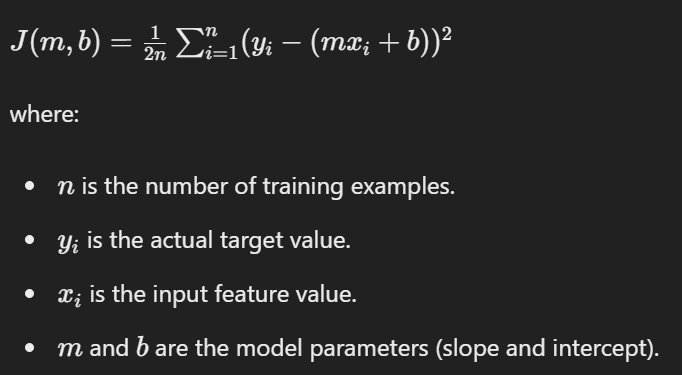

#### Gradient Descent Algorithm
1.	Initialize Parameters: Start with initial guesses for the parameters mmm and bbb.
2.	Compute the Gradient: Calculate the partial derivatives of the cost function with respect to each parameter:
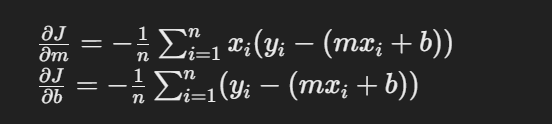
3.	Update Parameters: Adjust the parameters in the opposite direction of the gradient to minimize the cost function. This is done using the learning rate α

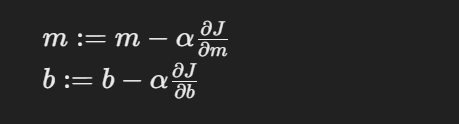

4.	Iterate: Repeat the gradient computation and parameter update steps until convergence (i.e., until the changes in the cost function are minimal or the maximum number of iterations is reached).



In [1]:
# Import necessary libraries

# Import numpy for numerical operations
import numpy as np

# Import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Import make_regression function from sklearn.datasets to generate synthetic regression data
from sklearn.datasets import make_regression

In [2]:
# Set the random seed to 42 for reproducibility
np.random.seed(42)

# Generate synthetic regression data with 150 samples, 1 feature, 1 informative feature,
# 1 target, and a noise level of 20. Setting random_state to 42 ensures reproducibility.
X, y = make_regression(n_samples=150, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

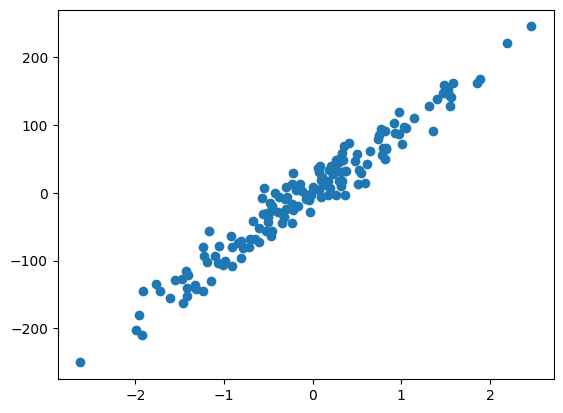

In [3]:
# Create a scatter plot of the generated data
# X is the input feature, and y is the target variable
plt.scatter(X, y)

# Display the plot
plt.show()

In [4]:
# Import the train_test_split function from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train and y_train are the training data and target values
# X_test and y_test are the testing data and target values
# test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
# This trains the linear regression model using the input features (X_train) and the target values (y_train)
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Retrieve the coefficients (slopes) of the trained linear regression model
# Retrieve the intercept (y-intercept) of the trained linear regression model
model.coef_, model.intercept_

(array([91.96056048]), 2.760908950722742)

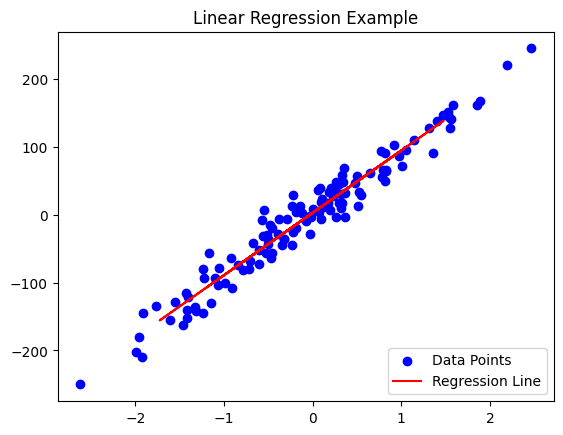

In [7]:
# Create a scatter plot of the training data
# X_train is the input feature and y_train is the target variable
# Color the data points blue and add a label "Data Points"
plt.scatter(X_train, y_train, color="blue", label="Data Points")

# Plot the regression line based on the test data
# Use the trained model to predict the target values for X_test
# Color the regression line red and add a label "Regression Line"
plt.plot(X_test, model.predict(X_test), color="red", label="Regression Line")

# Set the title of the plot
plt.title('Linear Regression Example')

# Display the legend at the lower right corner of the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [8]:
X_train.shape

(120, 1)

## Custom Linear Regression Gradient Descent

In [9]:
# Define a custom Linear Regression class using Gradient Descent
class LRGD:

    def __init__(self, epochs, learning_rate):
        # Initialize slope (m) and intercept (b) with arbitrary values
        self.m = 100
        self.b = 200
        
        # Set the number of epochs (iterations) and the learning rate for gradient descent
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X_train, y_train):
        # Fit the model to the training data using gradient descent
        for i in range(self.epochs):
            # Print the current values of the slope and intercept
            print(f"The slope: {self.m} and the intercept: {self.b}")

            # Calculate the gradients for b and m
            slope_b = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
            slope_m = -2 * np.sum((y_train - self.m * X_train.ravel() - self.b) * X_train.ravel())

            # Update the intercept (b) and slope (m) using the gradients
            b_new = self.b - self.learning_rate * slope_b
            m_new = self.m - self.learning_rate * slope_m

            # Check for convergence: if the changes in m and b are below a threshold, break the loop
            if abs(m_new - self.m) < 1e-5 and abs(b_new - self.b) < 1e-5:
                self.b = b_new
                self.m = m_new
                print("Breaking from loop as no major changes -----> " + str(i))
                break

            # Update the slope and intercept with the new values
            self.m = m_new
            self.b = b_new

        # Print the final values of the intercept and slope after training
        print(b_new, m_new, sep="\n")

    def predict(self, X_test):
        # Predict the target values for the test data using the trained model
        return self.m * X_test + self.b

In [10]:
# Create an instance of the custom Linear Regression using Gradient Descent (LRGD) class
# Initialize it with 20 epochs and a learning rate of 0.01
lrgd = LRGD(epochs=20, learning_rate=0.01)

# Fit the LRGD model to the training data (X_train and y_train)
lrgd.fit(X_train, y_train)

The slope: 100 and the intercept: 200
The slope: 120.48772782013276 and the intercept: -271.78439764326396
The slope: 0.5389505678668769 and the intercept: 392.76424319784377
The slope: 288.09893949496086 and the intercept: -561.3180805744107
The slope: -274.93733982053163 and the intercept: 831.2486295802564
The slope: 733.4666640297983 and the intercept: -1229.6586955873672
The slope: -986.951861614572 and the intercept: 1854.9760016542477
The slope: 1862.9240097290908 and the intercept: -2803.644384823793
The slope: -2768.719485533546 and the intercept: 4281.853010861361
The slope: 4662.637542720624 and the intercept: -6553.532905497859
The slope: -7155.391203799156 and the intercept: 10085.20855236603
The slope: 11521.551035522234 and the intercept: -15545.488584081135
The slope: -17863.630380332543 and the intercept: 24029.97390414335
The slope: 28220.908257200375 and the intercept: -37185.2105049246
The slope: -43884.911550075085 and the intercept: 57627.09670718189
The slope: 68

In [11]:
# Create an instance of the custom Linear Regression using Gradient Descent (LRGD) class
# Initialize it with 50 epochs and a learning rate of 0.001
lrgd = LRGD(epochs=50, learning_rate=0.001)

# Fit the LRGD model to the training data (X_train and y_train)
lrgd.fit(X_train, y_train)

The slope: 100 and the intercept: 200
The slope: 102.04877278201327 and the intercept: 152.8215602356736
The slope: 102.69318051330256 and the intercept: 117.00645085619091
The slope: 102.48116846511962 and the intercept: 89.79970785845421
The slope: 101.78007687814885 and the intercept: 69.11839163952956
The slope: 100.83150288142228 and the intercept: 53.386730525952565
The slope: 99.79027377839331 and the intercept: 41.41191449229825
The slope: 98.75199297545828 and the intercept: 32.29046890064026
The slope: 97.77239373959092 and the intercept: 25.337643133660816
The slope: 96.88084165766566 and the intercept: 20.034128585303755
The slope: 96.08967538970863 and the intercept: 15.98583128126911
The slope: 95.40060184668637 and the intercept: 12.893483740032202
The slope: 94.8090183974767 and the intercept: 10.529676421766888
The slope: 94.30688599631705 and the intercept: 8.72148708083222
The slope: 93.88459748521518 and the intercept: 7.337335876238301
The slope: 93.5321559294222 a

In [12]:
# Retrieve the coefficients (slopes) of the trained linear regression model
# Retrieve the intercept (y-intercept) of the trained linear regression model
model.coef_, model.intercept_

(array([91.96056048]), 2.760908950722742)

In [13]:
# Calculate the mean of the predicted values using the scikit-learn model (model) on the test data (X_test)
np.mean(model.predict(X_test))

-4.791759121722696

In [14]:
# Predict the target values for the test data (X_test) using the custom Linear Regression with Gradient Descent (lrgd) model
y_predict_lrgd = lrgd.predict(X_test)

# Calculate the mean of the predicted values from the custom model (lrgd) on the test data (X_test)
np.mean(y_predict_lrgd)

-4.791312201740066

In [15]:
# Retrieve the slope (m) from the trained custom Linear Regression with Gradient Descent (lrgd) model
m1 = lrgd.m

# Retrieve the intercept (b) from the trained custom Linear Regression with Gradient Descent (lrgd) model
b1 = lrgd.b

In [16]:
# Import the r2_score function from sklearn.metrics to compute the R-squared score
from sklearn.metrics import r2_score

# Calculate the R-squared score using the true test labels (y_test) and the predicted values (y_predict_lrgd)
r2_score(y_test, y_predict_lrgd)

0.9395281839135474

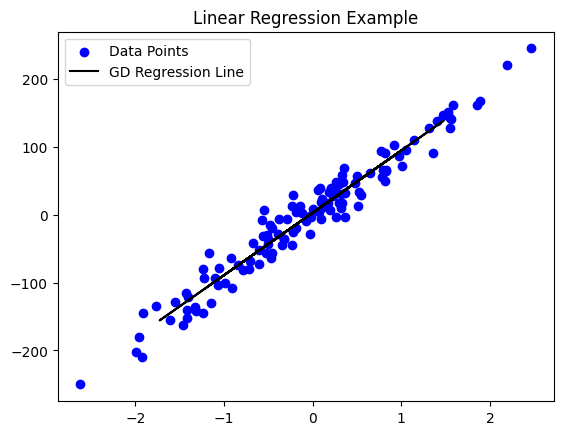

In [17]:
# Visualize the data points and regression line

# Scatter plot of the training data points
plt.scatter(X_train, y_train, color='blue', label='Data Points')

# Plot the regression line predicted by the custom Linear Regression with Gradient Descent (lrgd) model on the test data
plt.plot(X_test, lrgd.predict(X_test), color='black', label='GD Regression Line')

# Title of the plot
plt.title('Linear Regression Example')

# Display the legend to differentiate between the data points and the regression line
plt.legend()

# Show the plot
plt.show()

In [18]:
# Import the r2_score function from sklearn.metrics to compute the R-squared score
from sklearn.metrics import r2_score

# Calculate the R-squared score using the true test labels (y_test) and the predicted values from the scikit-learn model (model) on the test data (X_test)
print(r2_score(y_test, model.predict(X_test)))

# Calculate the R-squared score using the true test labels (y_test) and the predicted values from the custom model (m1*X_test + b1) on the test data (X_test)
print(r2_score(y_test, m1*X_test + b1))

0.9395273889475665
0.9395281839135474
